<a href="https://colab.research.google.com/github/saivenkatreddy29/TensorFlow-Learning/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-08-19 21:24:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-08-19 21:24:43 (4.99 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col = 'Date', parse_dates=['Date'])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
bitcoin_prices = df.rename( columns = {'Closing Price (USD)': 'Price'})['Price']

In [ ]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


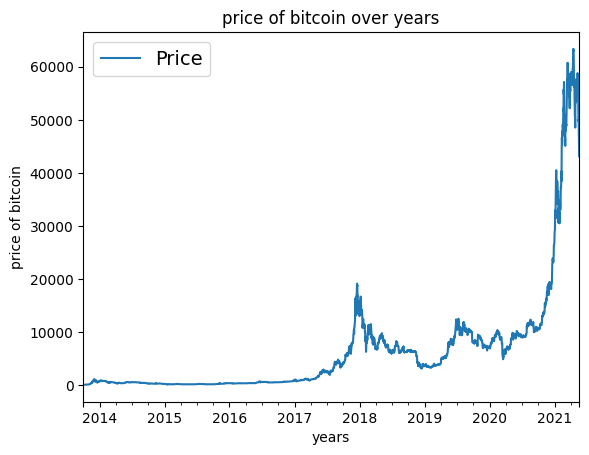

In [ ]:
bitcoin_prices.plot()
plt.ylabel('price of bitcoin')
plt.xlabel('years')
plt.title('price of bitcoin over years')
plt.legend(fontsize = 14)

In [ ]:
prices = []
year = []
import csv
from datetime import datetime
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  # print(f)
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    year.append(datetime.strptime(row[1], "%Y-%m-%d"))
    prices.append(float(row[2]))




In [ ]:
year[:10], prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'price along years')

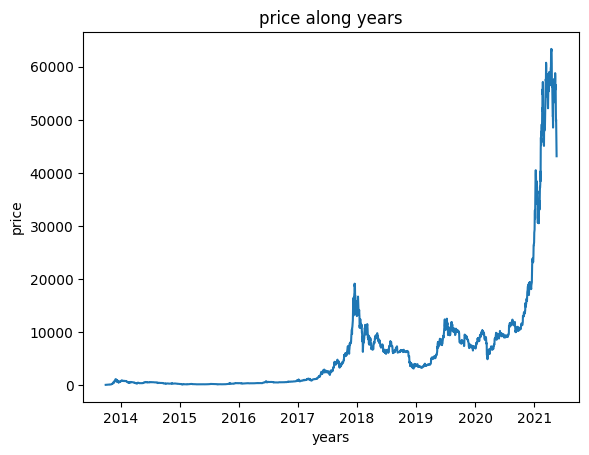

In [ ]:
plt.plot(year,prices)
plt.ylabel('price')
plt.xlabel('years')
plt.title('price along years')

In [ ]:
train_size = int(0.8 * len(year))

X_train = year[:train_size]
y_train = prices[:train_size]

X_test = year[train_size:]
y_test = prices[train_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

Text(0, 0.5, 'price')

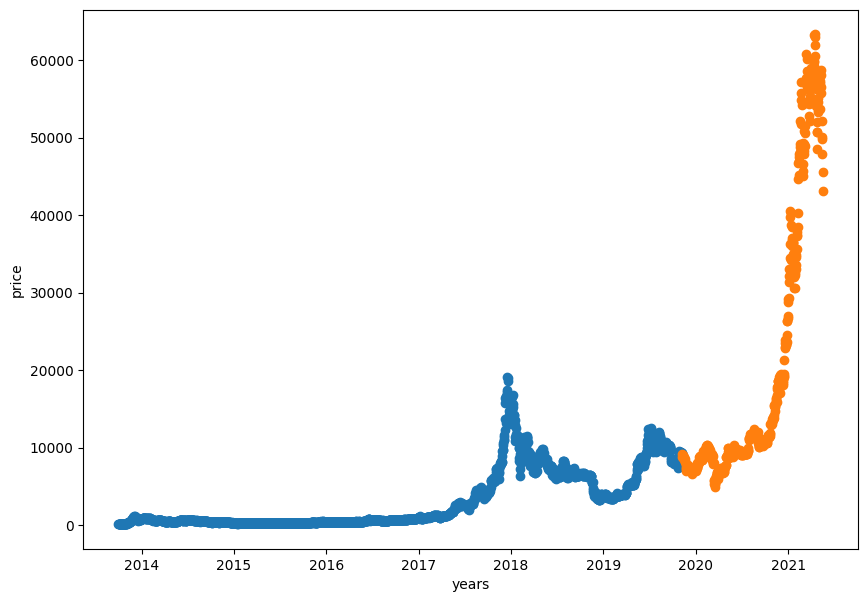

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.xlabel('years')
plt.ylabel('price')

In [ ]:
def plot_time_series(time, values, format = '.', start = 0, end = None, label = None):

  plt.plot(time[start:end], values[start:end], format,label = label)
  plt.xlabel('years')
  plt.ylabel('price')
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

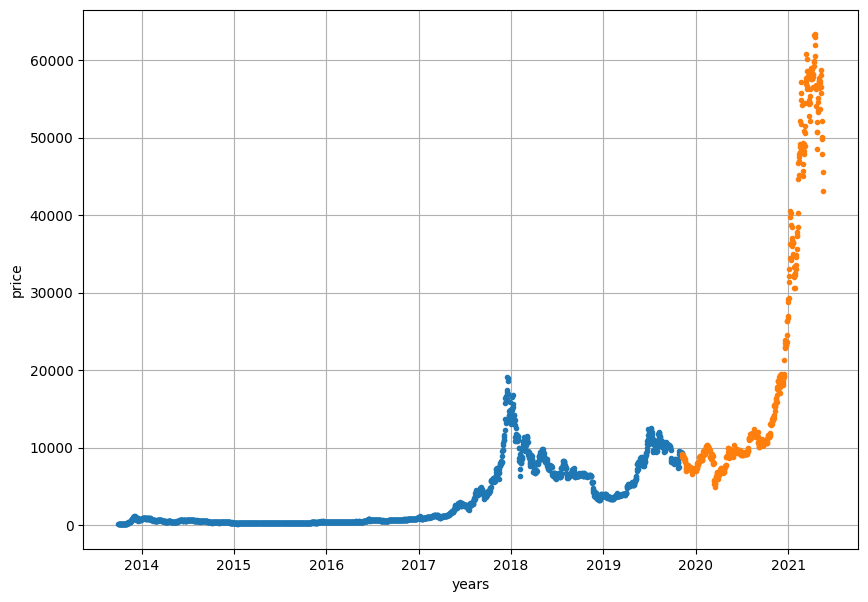

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_train, y_train)
plot_time_series(X_test,y_test)

# **Model experiments**

**Model 0 Naive Forecast**

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

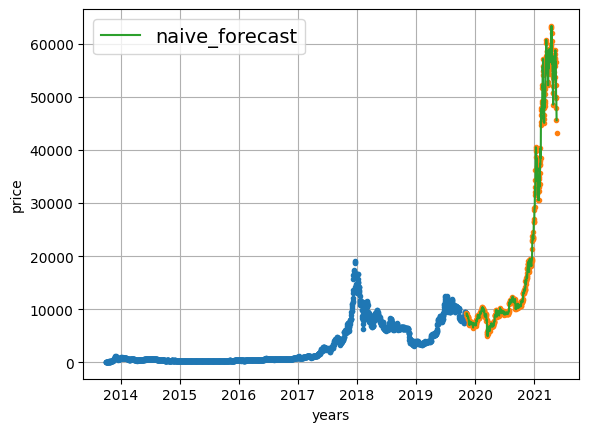

In [ ]:
plot_time_series(X_train,y_train)
plot_time_series(X_test,y_test,)
plot_time_series(X_test[1:], naive_forecast, format = '-', label = 'naive_forecast')

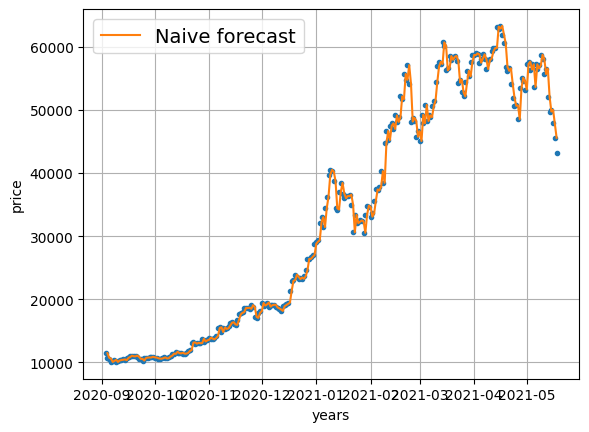

In [ ]:
# plot_time_series(X_train, y_train)
plot_time_series(X_test, y_test, start = 300)
offset = 300
plot_time_series(time=X_test[1:], values=naive_forecast, format="-", start=300, label="Naive forecast");

**Evaluating time series model**

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(abs(y_true - y_pred))

  #mae of naive forecast
  naive_mae = tf.reduce_mean(abs(y_true[1:] - y_true[:-1]))

  return mae/naive_mae

In [ ]:
def evaluate_preds(y_true, y_pred):
  # print('entered')
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)
  # print('crossed')

  mae_f = tf.keras.metrics.MeanAbsoluteError()
  mae_f.update_state(y_true, y_pred)
  mae = mae_f.result().numpy()

  #mase
  mase_f = tf.keras.metrics.MeanSquaredError()
  mase_f.update_state(y_true, y_pred)
  mse = mase_f.result().numpy()

  # mase
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

  #rmse
  rmse_f = tf.keras.metrics.RootMeanSquaredError()
  rmse_f.update_state(y_true, y_pred)
  rmse = rmse_f.result().numpy()

  #mape
  mape_f = tf.keras.metrics.MeanAbsolutePercentageError()
  mape_f.update_state(y_true, y_pred)
  mape = mape_f.result().numpy()

  return ({
      'mae': mae,
      'mse': mse,
      'rmse': rmse,
      'mape': mape,
      'mase': mase
  })

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

# **Windowing Datasets**

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:


def get_labeled_windows(x, horizon = 1):

  return x[:,:-horizon], x[:,-horizon:]


In [ ]:
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)

In [ ]:
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
rices = np.arange(3000)

In [ ]:
rices.shape

(3000,)

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  outputs = windows, labels
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labeled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
prices = np.array(prices)

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = 7, horizon = 1)

In [ ]:
full_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ]])

In [ ]:
full_labels[:3]

array([[123.033  ],
       [124.049  ],
       [125.96116]])

In [ ]:
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range (3):
  print(f"the window is {full_windows[i]} -->")
  print(full_labels[i])

the window is [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -->
[123.033]
the window is [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -->
[124.049]
the window is [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -->
[125.96116]


In [ ]:
# last 3 values
for i in range (3):
  print(f"the window is {full_windows[-i]} --> {full_labels[-i]}")

the window is [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> [123.033]
the window is [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> [43144.47129086]
the window is [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> [45604.61575361]


# **Turning into Training and Testing Datasets**

In [ ]:
def make_train_test_splits(windows, labels, test_size = 0.2):
  """
  Inputs = window, labels
  outputs = window_train, window_test,label_train, label_test
  """

  split = int((1-test_size) * len(windows))
  print(split)
  window_train, window_test = windows [:split], windows[split:]
  label_train, label_test = labels[:split], labels[split:]

  return window_train, window_test,label_train, label_test

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

2224


In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
WINDOW_SIZE, HORIZON

(7, 1)

In [ ]:
len(y_train)

2229

In [ ]:
np.array_equal(y_train[WINDOW_SIZE:], np.squeeze(train_labels))

False

In [ ]:
np.array(y_train).shape

(2229,)

In [ ]:
np.squeeze(train_labels).shape

(2224,)

In [ ]:
np.array(y_train[7:])

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
np.squeeze(train_labels[:-2])

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

# **Make a modeling Checkpoint**

In [ ]:
import os

In [ ]:
def create_model_checkpoint(model_name, savepath = 'model_experiments'):
  total_path = os.path.join(savepath, model_name + '.keras')
  print(total_path)

  back = tf.keras.callbacks.ModelCheckpoint(total_path,
                                     monitor='val_loss',
                                     verbose=1, save_best_only=True)
  return back

**Model1 Dense Model**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam()
               )

model_1.fit(train_windows,train_labels,
            epochs = 100, validation_data = (test_windows, test_labels),
            batch_size = 128,
            verbose = 1,
             callbacks = [create_model_checkpoint(model_name ='model_1_dense')]
            )

model_experiments/model_1_dense.keras
Epoch 1/100
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1804.6224
Epoch 1: val_loss improved from inf to 2642.72388, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1607.0305 - val_loss: 2642.7239
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 7s 412ms/step - loss: 432.9954
Epoch 2: val_loss improved from 2642.72388 to 1041.51355, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 350.7762 - val_loss: 1041.5135
Epoch 3/100
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155.7757  
Epoch 3: val_loss improved from 1041.51355 to 815.20441, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 159.7684 - val_loss: 815.2044
Epoch 4/100
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 143.3181 
Epoch 4: val_loss improved from 815.20441 to 765.94684, saving model to model_experiments/model_1_dense.keras
18/18 ━━━

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 335.8615 


650.955810546875

In [ ]:
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1_dense.keras')

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 285.7259  


573.3152465820312

In [ ]:
preds = model_1.predict(test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


# **Making forecasts on test data**

In [ ]:
def make_preds(model, input_data):

  preds = model.predict(input_data)
  preds = tf.squeeze(preds)
  return preds

In [ ]:
preds = make_preds(model_1, test_windows)
preds.shape

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


TensorShape([556])

In [ ]:
test_labels.shape

(556, 1)

In [ ]:
model1_results = evaluate_preds(tf.squeeze(test_labels), preds)
model1_results

{'mae': 573.3152,
 'mse': 1191293.2,
 'rmse': 1091.4639,
 'mape': 2.5727167,
 'mase': 1.007156}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
len(X_test), len(X_test[-len(test_windows):])

(558, 556)

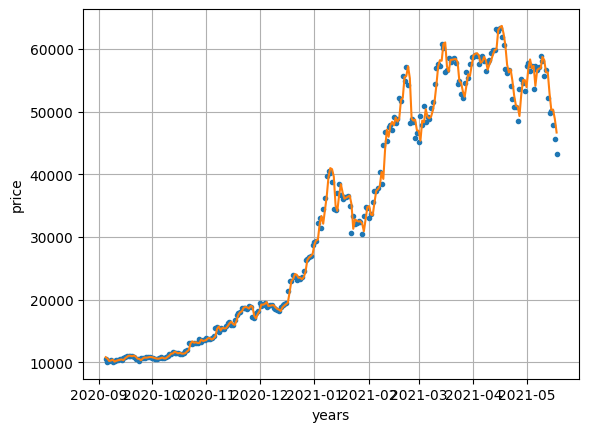

In [ ]:
offset = 300
plot_time_series(X_test[-len(test_windows):], test_labels, start = offset)
plot_time_series(X_test[-len(test_windows):], preds, format = '-', start = offset)

# **Dense model 2 window 30 and horizon 1**

In [ ]:
 full_windows, full_labels = make_windows(prices, window_size = 30, horizon = 1)

In [ ]:
full_windows[1].shape, full_labels[1]

((30,), array([198.04883]))

In [ ]:
train_windows,test_windows, train_labels,  test_labels =  make_train_test_splits(full_windows, full_labels)

2205


In [ ]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

**model 2**

In [ ]:
model_2 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON)
])

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,train_labels, epochs = 100, verbose = 0,
            batch_size = 128, validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name= 'model_2_dense')])

model_experiments/model_2_dense.keras

Epoch 1: val_loss improved from inf to 4362.16699, saving model to model_experiments/model_2_dense.keras

Epoch 2: val_loss improved from 4362.16699 to 2997.79126, saving model to model_experiments/model_2_dense.keras

Epoch 3: val_loss improved from 2997.79126 to 1837.82190, saving model to model_experiments/model_2_dense.keras

Epoch 4: val_loss improved from 1837.82190 to 1646.30090, saving model to model_experiments/model_2_dense.keras

Epoch 5: val_loss improved from 1646.30090 to 1518.75879, saving model to model_experiments/model_2_dense.keras

Epoch 6: val_loss did not improve from 1518.75879

Epoch 7: val_loss did not improve from 1518.75879

Epoch 8: val_loss improved from 1518.75879 to 1223.41516, saving model to model_experiments/model_2_dense.keras

Epoch 9: val_loss did not improve from 1223.41516

Epoch 10: val_loss did not improve from 1223.41516

Epoch 11: val_loss did not improve from 1223.41516

Epoch 12: val_loss improved from 

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 320.1560 


629.8623046875

In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense.keras')

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 300.4711  


597.4994506835938

In [ ]:
pred_2 = make_preds(model_2, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), pred_2)
model_2_results

{'mae': 597.49945,
 'mse': 1221494.5,
 'rmse': 1105.2124,
 'mape': 2.6720593,
 'mase': 1.0444348}

In [ ]:
len(X_test)

558

In [ ]:
len(test_windows), len(test_labels)

(552, 552)

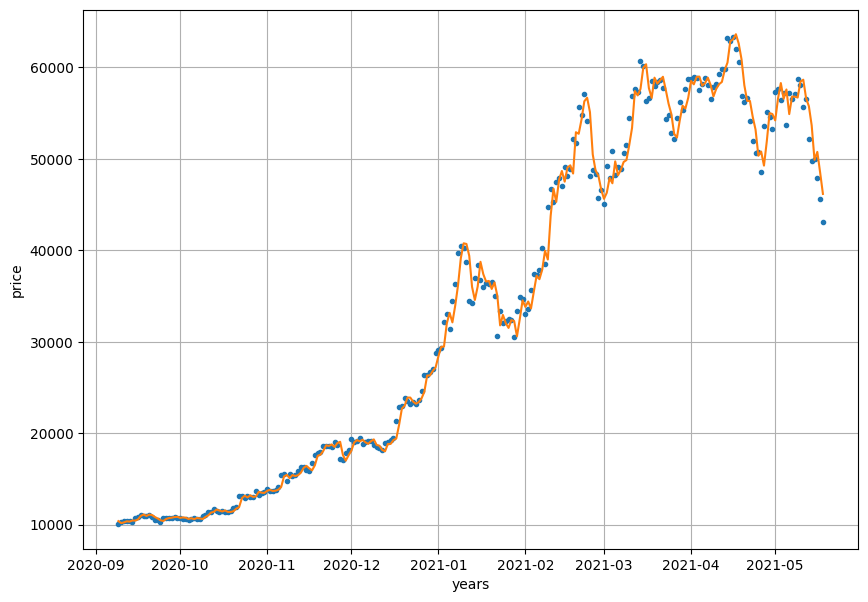

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_test[-len(test_windows):], test_labels, start = 300)
plot_time_series(X_test[-len(test_windows):], pred_2, start = 300, format = '-')

**model 3 Dense window 30 horizon 7**

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = 30, horizon = 7)

In [ ]:
full_windows[0].shape, full_labels[0].shape

((30,), (7,))

In [ ]:
train_windows,test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

2200


In [ ]:
len(train_windows), len(test_windows),len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
model_3 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(7)
])

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows, train_labels, epochs = 100, batch_size = 128,
            validation_data = (test_windows, test_labels),verbose = 0,
            callbacks = [create_model_checkpoint('model_3_dense')])

model_experiments/model_3_dense.keras

Epoch 1: val_loss improved from inf to 2801.57935, saving model to model_experiments/model_3_dense.keras

Epoch 2: val_loss improved from 2801.57935 to 2653.14624, saving model to model_experiments/model_3_dense.keras

Epoch 3: val_loss improved from 2653.14624 to 2090.70093, saving model to model_experiments/model_3_dense.keras

Epoch 4: val_loss improved from 2090.70093 to 1889.33911, saving model to model_experiments/model_3_dense.keras

Epoch 5: val_loss improved from 1889.33911 to 1818.32971, saving model to model_experiments/model_3_dense.keras

Epoch 6: val_loss improved from 1818.32971 to 1687.00562, saving model to model_experiments/model_3_dense.keras

Epoch 7: val_loss did not improve from 1687.00562

Epoch 8: val_loss did not improve from 1687.00562

Epoch 9: val_loss improved from 1687.00562 to 1670.43420, saving model to model_experiments/model_3_dense.keras

Epoch 10: val_loss improved from 1670.43420 to 1513.23315, saving model to 

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 736.2977 


1476.124267578125

In [ ]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense.keras")

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 641.7854 


1238.8182373046875

In [ ]:
model_3_preds = make_preds(model_3,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
model_3_preds.shape

TensorShape([551, 7])

In [ ]:
tf.squeeze(test_labels).shape

TensorShape([551, 7])

In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1238.8184,
 'mse': 5390364.5,
 'rmse': 2321.7158,
 'mape': 5.6900253,
 'mase': 2.2044077}

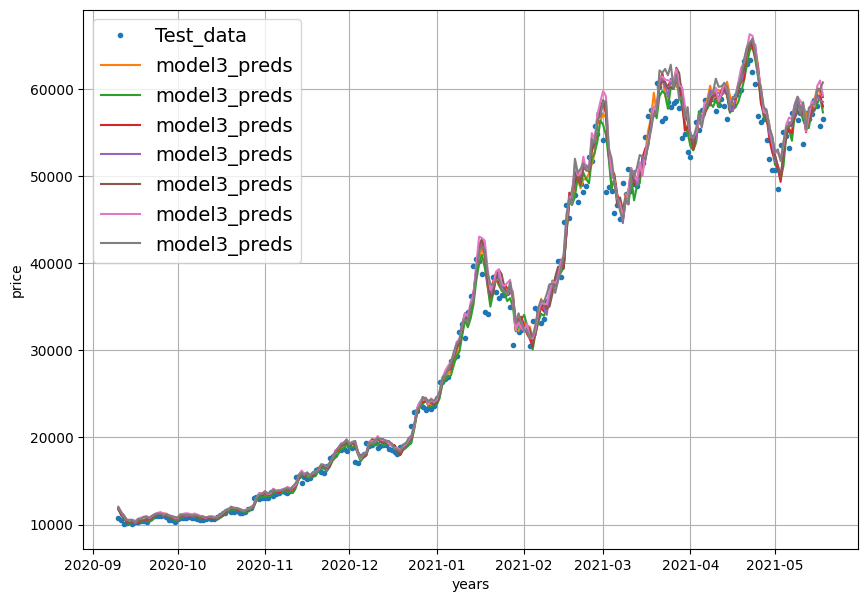

In [ ]:
k = 300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], test_labels[:,0], start = 300, label = 'Test_data')
plot_time_series(X_test[-len(test_labels):], model_3_preds, start = k, format = '-', label = 'model3_preds')

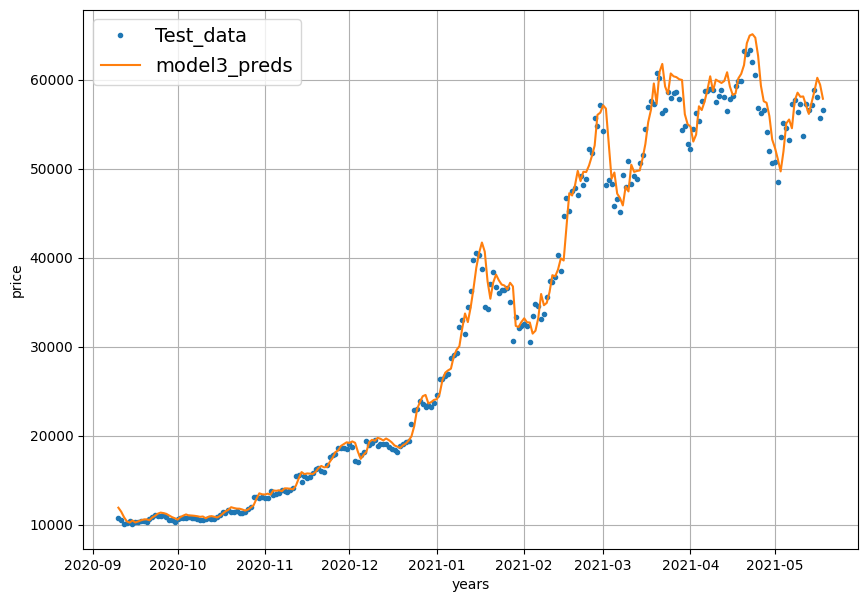

In [ ]:
k = 300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], test_labels[:,0], start = 300, label = 'Test_data')
plot_time_series(X_test[-len(test_labels):], model_3_preds[:,0], start = k, format = '-', label = 'model3_preds')

In [ ]:
model1_results['mae']

573.3152

In [ ]:
model_maes = {
    'naive': naive_results['mae'],
    'm1': model1_results['mae'],
    'm2': model_2_results['mae'],
    'm3': model_3_results['mae']
}

In [ ]:
results = pd.DataFrame([model_maes],index=['mae'])


In [ ]:
results

,naive,m1,m2,m3
mae,567.980225,573.315186,597.499451,1238.818359


<Axes: >

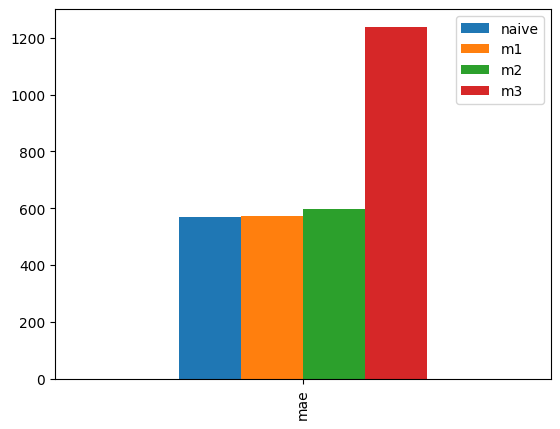

In [ ]:
results.plot(kind = 'bar')

# **Model 4 1D convolution**

In [ ]:
WINDOW_SIZE, HORIZON

(7, 1)

In [ ]:
full_windows, full_labels = make_windows(prices)

In [ ]:
train_windows, test_windows,train_labels,test_labels = make_train_test_splits(full_windows, full_labels)

2224


In [ ]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
train_windows[0]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [ ]:
dim_layer = layers.Lambda(lambda x:tf.expand_dims(x, axis = 1))

In [ ]:
inputs = layers.Input(shape = (7,))
x = layers.Reshape((1, 7))(inputs)
x = layers.Conv1D(filters = 128, kernel_size = 5, padding = 'causal', activation = 'relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs, outputs)


In [ ]:
model_4.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
from sys import call_tracing
model_4.fit(train_windows,
            train_labels,
            epochs = 100,
            validation_data = [test_windows,test_labels],
            batch_size = 128,
            callbacks = [create_model_checkpoint('model_4_conv')])

model_experiments/model_4_conv.keras
Epoch 1/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 2590.2825
Epoch 1: val_loss improved from inf to 1103.35864, saving model to model_experiments/model_4_conv.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2200.4817 - val_loss: 1103.3586
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 156.1379
Epoch 2: val_loss did not improve from 1103.35864
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 329.3270 - val_loss: 1509.5403
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 270.1318
Epoch 3: val_loss improved from 1103.35864 to 1017.46985, saving model to model_experiments/model_4_conv.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 238.0820 - val_loss: 1017.4698
Epoch 4/100
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187.8606  
Epoch 4: val_loss did not improve from 1017.46985
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 188.2081 - val_loss: 1038.7961
Epoch 5/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - lo

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 310.6707 


623.7396240234375

In [ ]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv.keras')
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 290.6318  


576.06982421875

In [ ]:
preds_4 = make_preds(model_4, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), preds_4)

In [ ]:
model_4_results

{'mae': 576.0698,
 'mse': 1203023.9,
 'rmse': 1096.8245,
 'mape': 2.5943425,
 'mase': 1.0119951}

# **Model 5 RNN (LSTM)**

In [ ]:
tf.random.set_seed(42)
Inputs = layers.Input(shape = (7,))
x = layers.Reshape((1, 7))(Inputs)
x = layers.LSTM(128, activation= 'relu')(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(Inputs, outputs)


In [ ]:
model_5.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,761 (272.50 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_5.compile(loss = 'mae', optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_5.fit(train_windows, train_labels, epochs = 100,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = create_model_checkpoint('model_5_lstm'))

model_experiments/model_5_lstm.keras
Epoch 1/100
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2888.4619
Epoch 1: val_loss improved from inf to 11503.11523, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2731.7034 - val_loss: 11503.1152
Epoch 2/100
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1644.9247  
Epoch 2: val_loss improved from 11503.11523 to 3078.51489, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1497.2561 - val_loss: 3078.5149
Epoch 3/100
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 338.8378  
Epoch 3: val_loss improved from 3078.51489 to 1134.22400, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 322.6809 - val_loss: 1134.2240
Epoch 4/100
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 187.7688  
Epoch 4: val_loss improved from 1134.22400 to 1031.28687, saving model to model_experiments/model_5_lstm.keras
18/18

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 302.8063 


608.126220703125

In [ ]:
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm.keras")
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 296.2157  


592.8941650390625

In [ ]:
preds_5 = make_preds(model_5, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
results_model_5 = evaluate_preds(test_labels, preds_5)

In [ ]:
results_model_5

{'mae': 592.8941,
 'mse': 1250508.0,
 'rmse': 1118.2611,
 'mape': 2.6564677,
 'mase': 30.085436}

# **Make Multivariate time series**

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed= bitcoin_prices.copy()

In [ ]:
print(bitcoin_prices.name)


Price


In [ ]:
bitcoin_prices_windowed = bitcoin_prices_windowed.to_frame()


In [ ]:
bitcoin_prices_windowed

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
bitcoin_prices_windowed.columns

Index(['Price'], dtype='object')

In [ ]:
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
bitcoin_prices_windowed= bitcoin_prices_windowed.dropna()

In [ ]:
bitcoin_prices_windowed.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
bitcoin_prices_windowed.tail()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


Add Block rewards

upto  9 july 2016 25

upto 11 may 2020 12.5

upto 2025 6.5


In [ ]:
 bitcoin_prices_windowed['block_reward'] = None

<ipython-input-129-00e9842fcc56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_prices_windowed['block_reward'] = None


In [ ]:
# Assuming bitcoin_prices_windowed is your DataFrame
bitcoin_prices_windowed['block_reward'] = 0  # Initialize with 0

# Create boolean masks for different date ranges
mask_25 = bitcoin_prices_windowed.index < pd.Timestamp('2016-07-25')
mask_12_5 = (bitcoin_prices_windowed.index >= pd.Timestamp('2016-07-25')) & (bitcoin_prices_windowed.index < pd.Timestamp('2020-05-11'))
mask_6_25 = bitcoin_prices_windowed.index >= pd.Timestamp('2020-05-11')

# Assign block rewards based on the masks
bitcoin_prices_windowed.loc[mask_25, 'block_reward'] = 25
bitcoin_prices_windowed.loc[mask_12_5, 'block_reward'] = 12.5
bitcoin_prices_windowed.loc[mask_6_25, 'block_reward'] = 6.25

<ipython-input-130-078e9f81d79c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_prices_windowed['block_reward'] = 0  # Initialize with 0
<ipython-input-130-078e9f81d79c>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bitcoin_prices_windowed.loc[mask_12_5, 'block_reward'] = 12.5


In [ ]:
bitcoin_prices_windowed.tail()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,block_reward
Date,,,,,,,,,
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879,6.25
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,6.25
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,6.25
2021-05-17,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,6.25
2021-05-18,43144.471291,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,6.25


In [ ]:
X = bitcoin_prices_windowed.drop('Price', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed['Price'].astype(np.float32)

In [ ]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [ ]:
split_size = int(0.8 * len(X))
X_train = X[:split_size]
y_train = y[:split_size]
X_test = X[split_size:]
y_test = y[split_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

# **model 6 dense layer**

In [ ]:
inputs = layers.Input(shape= (8,))
x = layers.Dense(128,'relu')(inputs)
outputs = layers.Dense(1)(x)

model_6 = tf.keras.Model(inputs, outputs)

In [ ]:
model_6.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_6.compile(loss = 'mae',
               optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_6.fit(X_train, y_train, epochs = 100,
            validation_data = (X_test, y_test),
            batch_size = 128,
            callbacks = [create_model_checkpoint('model_6_dense')])

model_experiments/model_6_dense.keras
Epoch 1/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 14s 868ms/step - loss: 4620.6045
Epoch 1: val_loss improved from inf to 4606.73389, saving model to model_experiments/model_6_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3321.7627 - val_loss: 4606.7339
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 777.5741
Epoch 2: val_loss improved from 4606.73389 to 888.70557, saving model to model_experiments/model_6_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 460.6186 - val_loss: 888.7056
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 163.8438
Epoch 3: val_loss did not improve from 888.70557
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 212.5450 - val_loss: 1020.4587
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 203.1572
Epoch 4: val_loss improved from 888.70557 to 882.44727, saving model to model_experiments/model_6_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.8694 - val_loss: 882.4

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 286.3301 


574.099609375

In [ ]:
model_6 = tf.keras.models.load_model('/content/model_experiments/model_6_dense.keras')


In [ ]:
pred_6 = make_preds(model_6, X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
evaluate_preds(y_test, pred_6)

{'mae': 574.0995,
 'mse': 1190085.1,
 'rmse': 1090.9103,
 'mape': 2.5669227,
 'mase': 1.0085338}

# **nbeats algoritms**

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size,
               theta_size,
               horizon,
               n_neurons,
               n_layers,
               **kwargs):

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # The block consists of 4 fully stacked layers
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range (n_layers)]

    #Output block is theta with no activation function
    self.theta = tf.keras.layers.Dense(theta_size, activation = 'linear', name = 'theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta(x)
    backcast, forecast = theta[:, :self.input_size] ,theta[:, -self.horizon:]

    return backcast, forecast





In [ ]:
dummy_nbeats = NBeatsBlock(input_size = WINDOW_SIZE,
                           theta_size = WINDOW_SIZE + HORIZON,
                           n_neurons = 128,
                           n_layers = 4,
                           horizon = HORIZON)


In [ ]:
dummy_inputs = tf.expand_dims(np.arange(10)+1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 10), dtype=int64, numpy=array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])>

In [ ]:
back , fore = dummy_nbeats(dummy_inputs)

In [ ]:
tf.squeeze(back)

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([-0.41622072, -0.53147805, -1.4667886 ,  0.02597512,  1.0357685 ,
       -0.8880667 , -0.6625235 ], dtype=float32)>

In [ ]:
tf.squeeze(fore)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6532043>

# **Preparing data for N beats algorithm**

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7



In [ ]:
X_train = X_train.drop('block_reward', axis = 1)
X_test = X_test.drop('block_reward', axis = 1)

KeyError: "['block_reward'] not found in axis"

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
train_features = tf.data.Dataset.from_tensor_slices(X_train)
train_labels = tf.data.Dataset.from_tensor_slices(y_train)

test_features = tf.data.Dataset.from_tensor_slices(X_test)
test_labels = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip(train_features, train_labels).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip(test_features, test_labels).prefetch(tf.data.AUTOTUNE)

In [ ]:
BATCH_SIZE =32

In [ ]:
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
train_dataset, test_dataset

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

**Setting Hyper parameters**

In [ ]:
#  input_size,
#                theta_size,
#                horizon,
#                n_neurons,
#                n_layers,

In [ ]:
BATCH_SIZE = 1024
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
N_EPOCHS = 5000

INPUT_SIZE = int(WINDOW_SIZE * HORIZON)
THETA_SIZE = INPUT_SIZE + HORIZON

In [ ]:
INPUT_SIZE

7

**Getting ready for resedual connections**

In [ ]:
tensor1 = tf.range(10)+5
tensor2 = tf.range(10)+2
tensor1, tensor2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>)

In [ ]:
layers.subtract([tensor1, tensor2])

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)>

In [ ]:
layers.add([tensor1, tensor2])

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 7,  9, 11, 13, 15, 17, 19, 21, 23, 25], dtype=int32)>

In [ ]:
n_beatslayer = NBeatsBlock(input_size = INPUT_SIZE,
                           theta_size = THETA_SIZE,
                horizon = HORIZON,
                n_neurons = N_NEURONS,
                n_layers = N_LAYERS,
                name = 'nbeats_layer')

In [ ]:
stack_inputs = layers.Input(shape=(7,), name="stack_input")

backcast,forecast = n_beatslayer(stack_inputs)
reseduals = layers.subtract([stack_inputs, backcast], name = f'substract')
# out = layers.add
for i,_ in enumerate(range(N_LAYERS-1)):
  n_beatslayer = NBeatsBlock(theta_size = THETA_SIZE,
                input_size = INPUT_SIZE,
                horizon = HORIZON,
                n_neurons = N_NEURONS,
                n_layers = N_LAYERS,
                name = f'nbeats_layer_stack{i}')

  new_back,new_fore = n_beatslayer(reseduals)

  reseduals = layers.subtract([reseduals,new_back], name =f'subtraction_layer_{i}')
  forecast = layers.add([forecast,new_fore], name = f'addition_layer_{i}')

model_7 = tf.keras.Model(stack_inputs,forecast, name = 'model_7_nbeats')



In [ ]:
model_7.compile(loss= 'mae',
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ['mae', 'mse'])

In [ ]:
model_7.fit(train_dataset,
            epochs = 1000,
            validation_data = (test_dataset),
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience = 200, restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(patience = 100, verbose = 1)])


Epoch 200: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 300: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [ ]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 573.1438 - mae: 573.1438 - mse: 1174598.8750


[573.143798828125, 573.143798828125, 1174598.875]

In [ ]:
model7_preds = make_preds(model_7, test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


In [ ]:
model7_results = evaluate_preds(tf.squeeze(y_test), model7_preds)

In [ ]:
model7_results

{'mae': 573.14386,
 'mse': 1174598.6,
 'rmse': 1083.7891,
 'mape': 2.6294243,
 'mase': 1.006855}

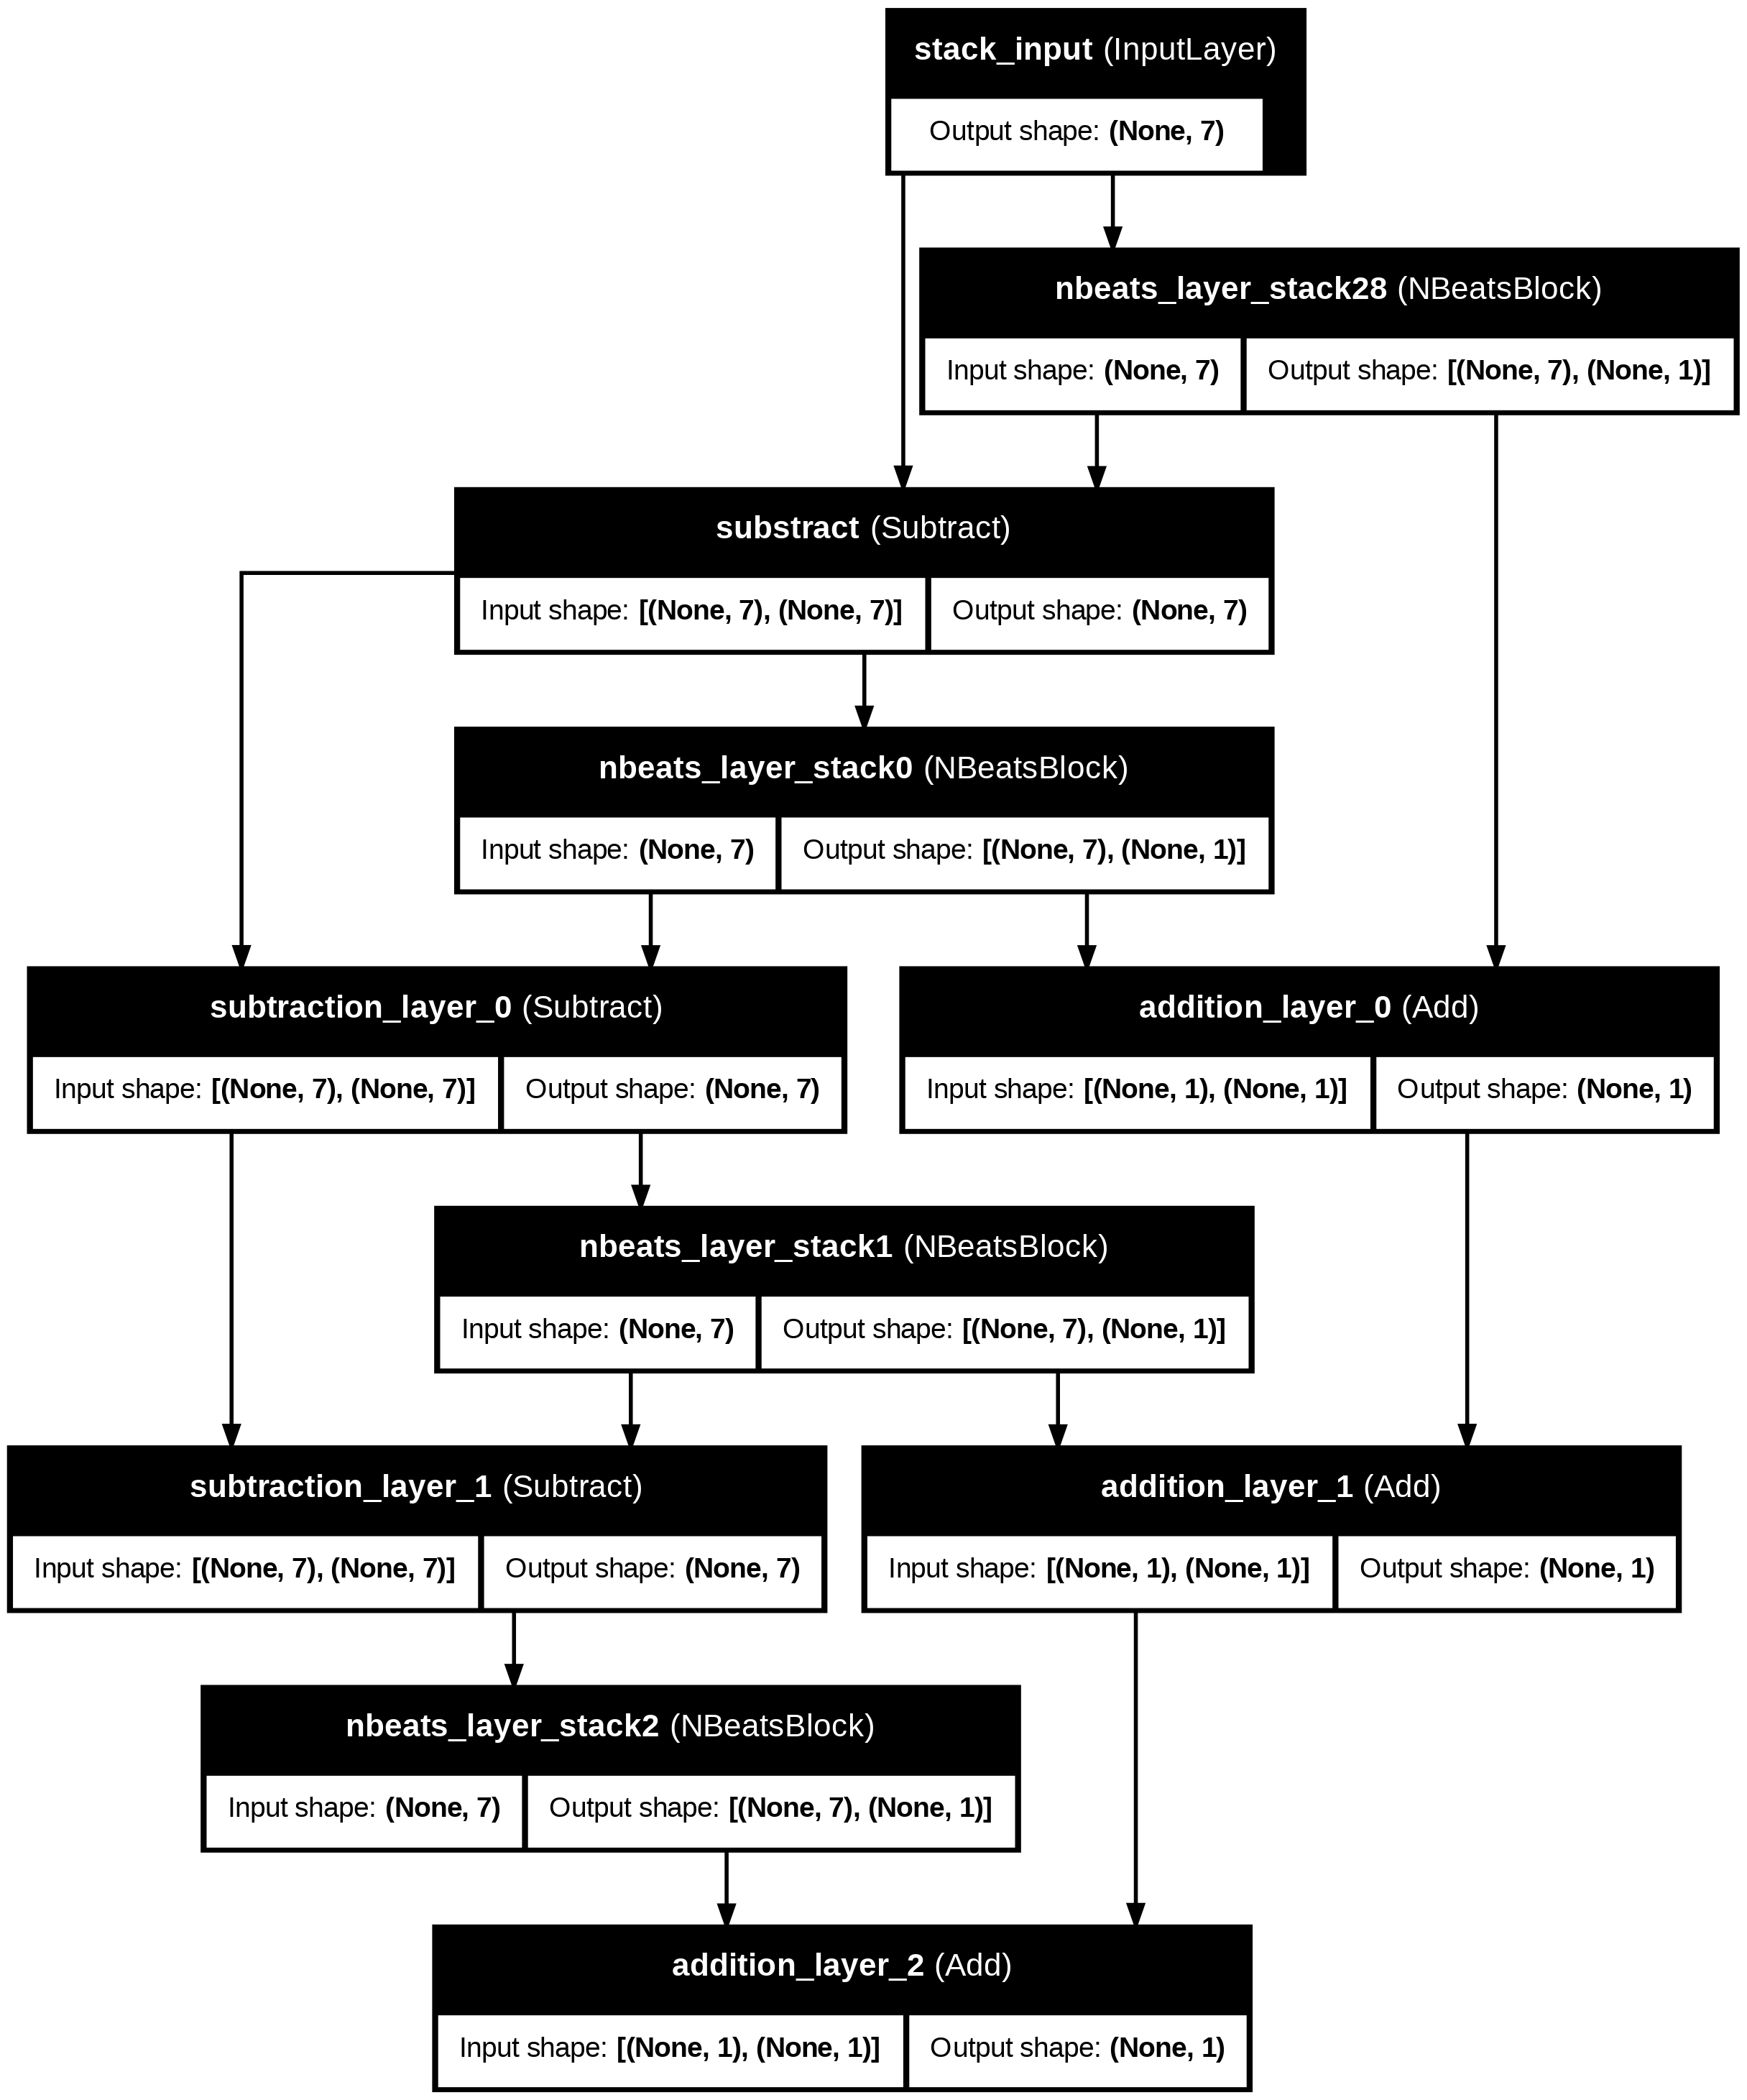

In [ ]:
from tensorflow.keras.utils import plot_model
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Replace with the actual path to your Graphviz bin directory if it's different

# Try plotting a simplified version of the model
plot_model(model_7, show_shapes=True, show_layer_names=True, to_file='model.png')

# **Model 8 Ensembled Layer**


In [ ]:
X_train = X_train.drop('block_reward', axis = 1)

In [ ]:
X_test

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2019-11-10,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039,9290.896484
2019-11-11,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039
2019-11-12,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930
2019-11-13,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609
2019-11-14,8760.892578,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953
...,...,...,...,...,...,...,...
2021-05-14,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


In [ ]:
X_test = X_test.drop('block_reward', axis = 1)

KeyError: "['block_reward'] not found in axis"

In [ ]:
metrics = ['mae', 'mse', 'mape']

In [ ]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
ens_models = []
def ensembled(metrics):
  for metric in metrics:
    for i in range (5):
      Input = layers.Input(shape = (7,))
      x = layers.Dense(128, activation = 'relu', kernel_initializer= 'he_normal')(Input)
      x = layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal')(x)
      output = layers.Dense(1)(x)
      model_8 = tf.keras.Model(Input, output)

      model_8.compile(loss = metric,
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['mae', 'mse'])
      model_8.fit(train_dataset, epochs = 100,verbose = 0, validation_data = test_dataset)

      ens_models.append(model_8)
  return ens_models


In [ ]:
ens_models = ensembled(metrics)

In [ ]:
len(ens_models)
ens_predictions = []

In [ ]:
for model in ens_models:
  pred = model.predict(test_dataset)
  ens_predictions.append(pred)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
ens_predictions = tf.squeeze(ens_predictions)

In [ ]:
final_preds = np.median(ens_predictions, axis = 0)

In [ ]:
len(final_preds)

556

In [ ]:
ensembled_results = evaluate_preds(y_test, final_preds)
ensembled_results

{'mae': 615.80853,
 'mse': 1272232.6,
 'rmse': 1127.9329,
 'mape': 2.8392334,
 'mase': 1.081805}